In [1]:
import matplotlib.pyplot as plt
import scipy.io as scio
import scipy.stats
import numpy as np
 
dataFile = 'hw1data.mat'
data = scio.loadmat(dataFile)
data['__header__']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Sep 18 00:04:23 2017'

In [2]:
train = data['trainData']
test = data['testData']


In [3]:
train.shape,test.shape

((1501, 2), (1200, 2))

In [4]:
y = train[:,0]
labels = list(set(y))

In [5]:
train_1 = train[train[:,0] == labels[0]]
train_2 = train[train[:,0] == labels[1]]
train_3 = train[train[:,0] == labels[2]]
train_4 = train[train[:,0] == labels[3]]

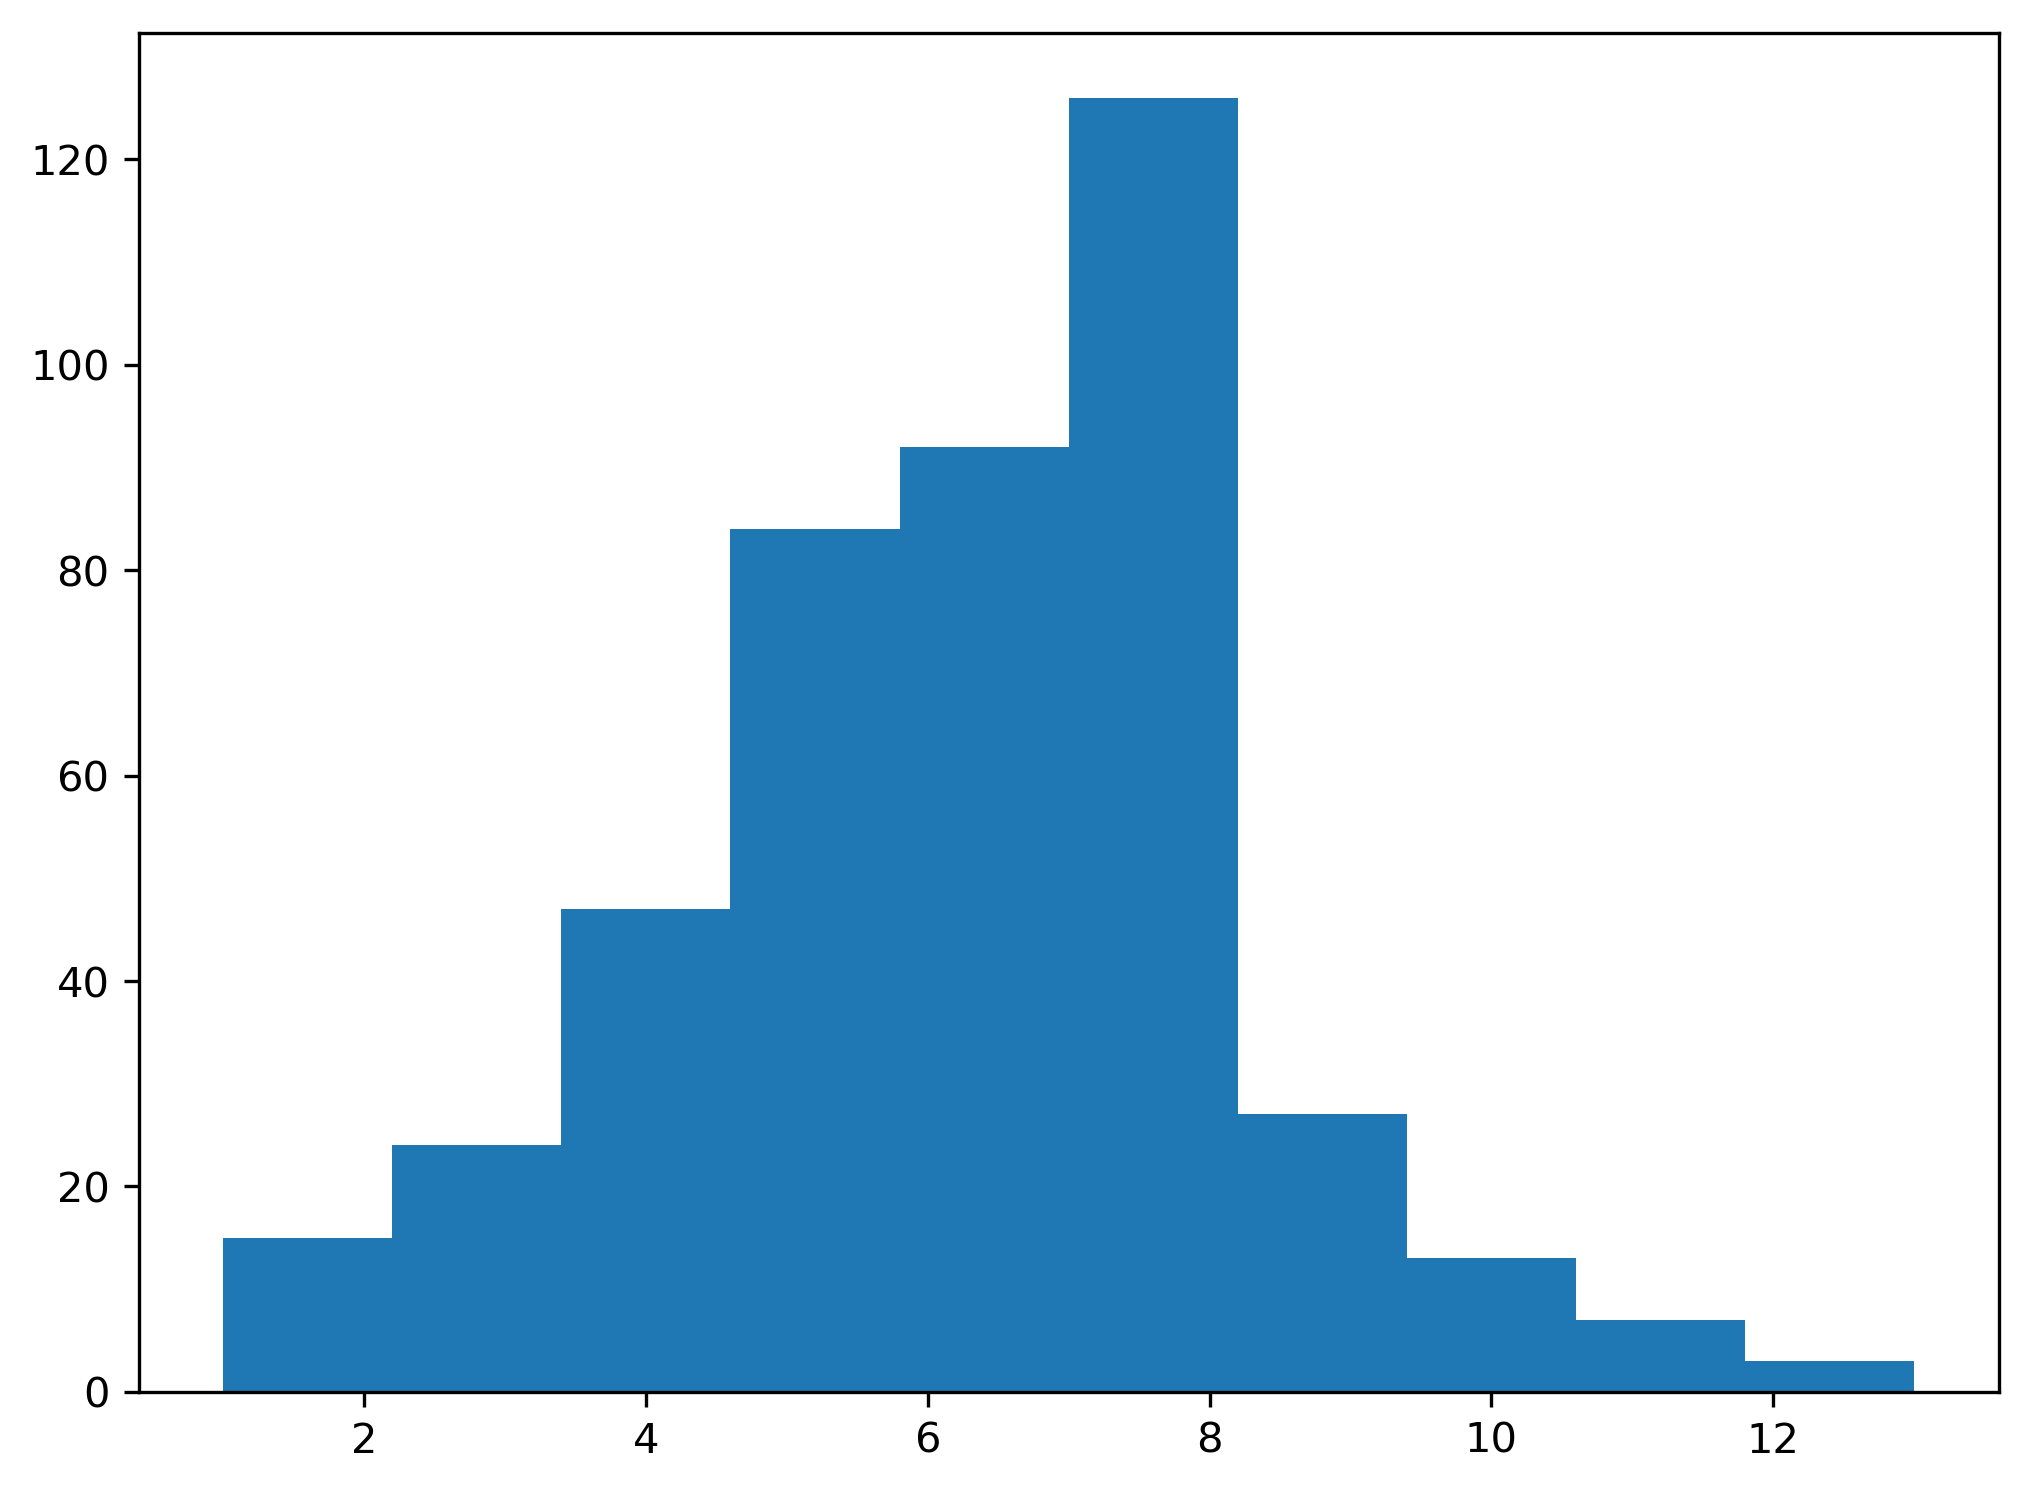

In [6]:
plt.figure(figsize=(8,6), dpi = 300)
plt.hist(train_1[:,1])
plt.show()

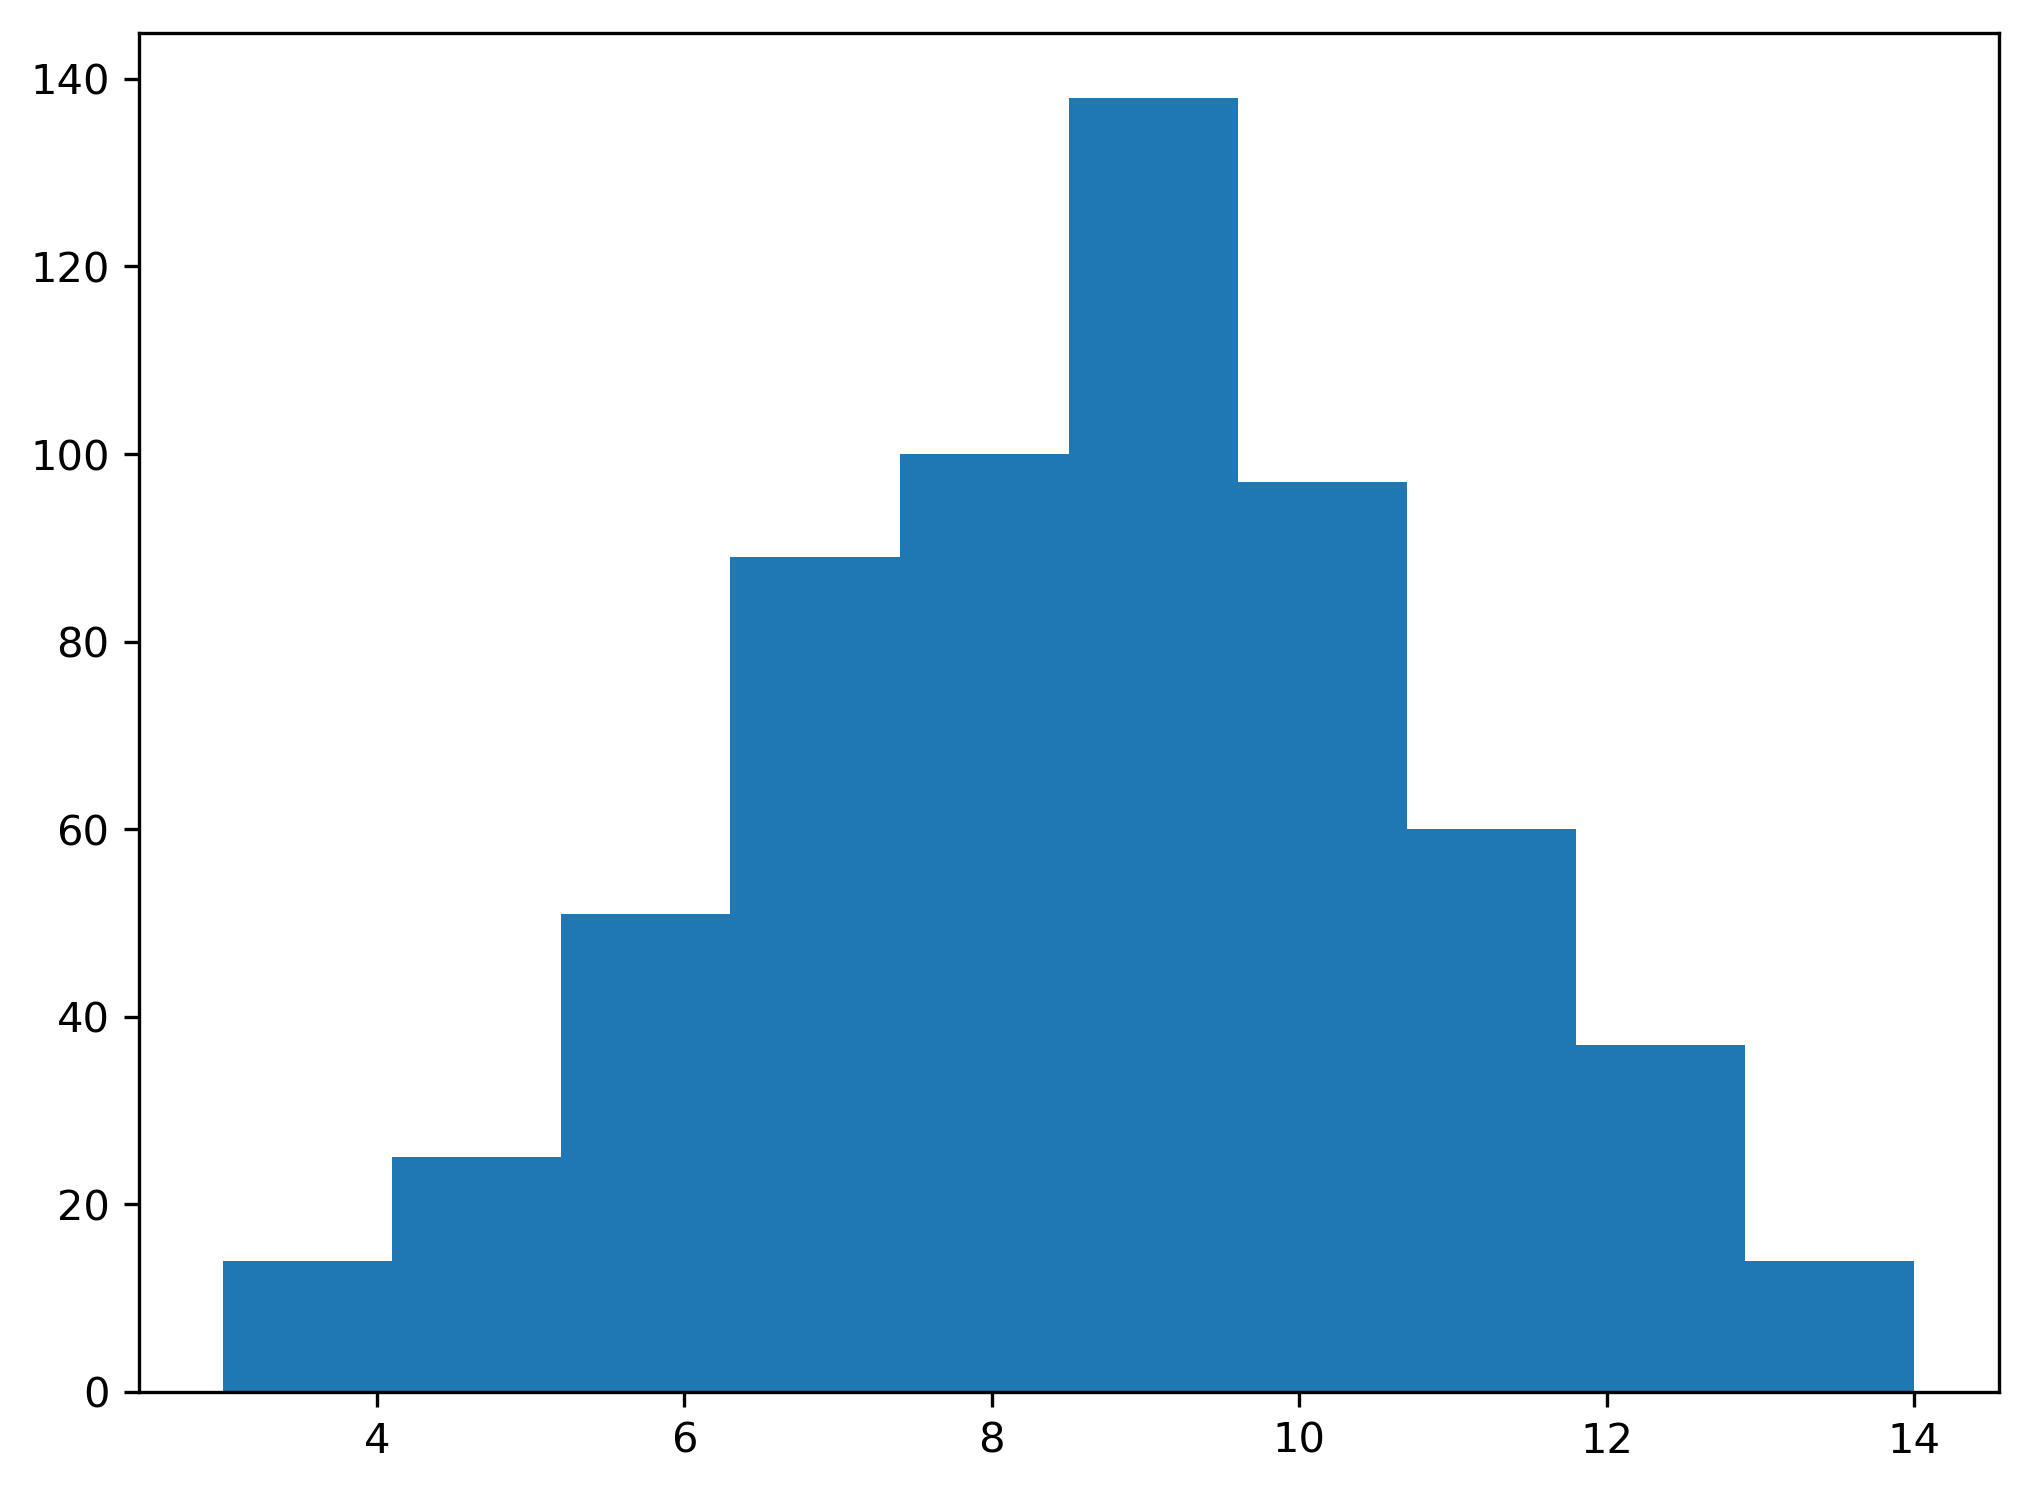

In [7]:
plt.figure(figsize=(8,6), dpi = 300)
plt.hist(train_2[:,1])
plt.show()

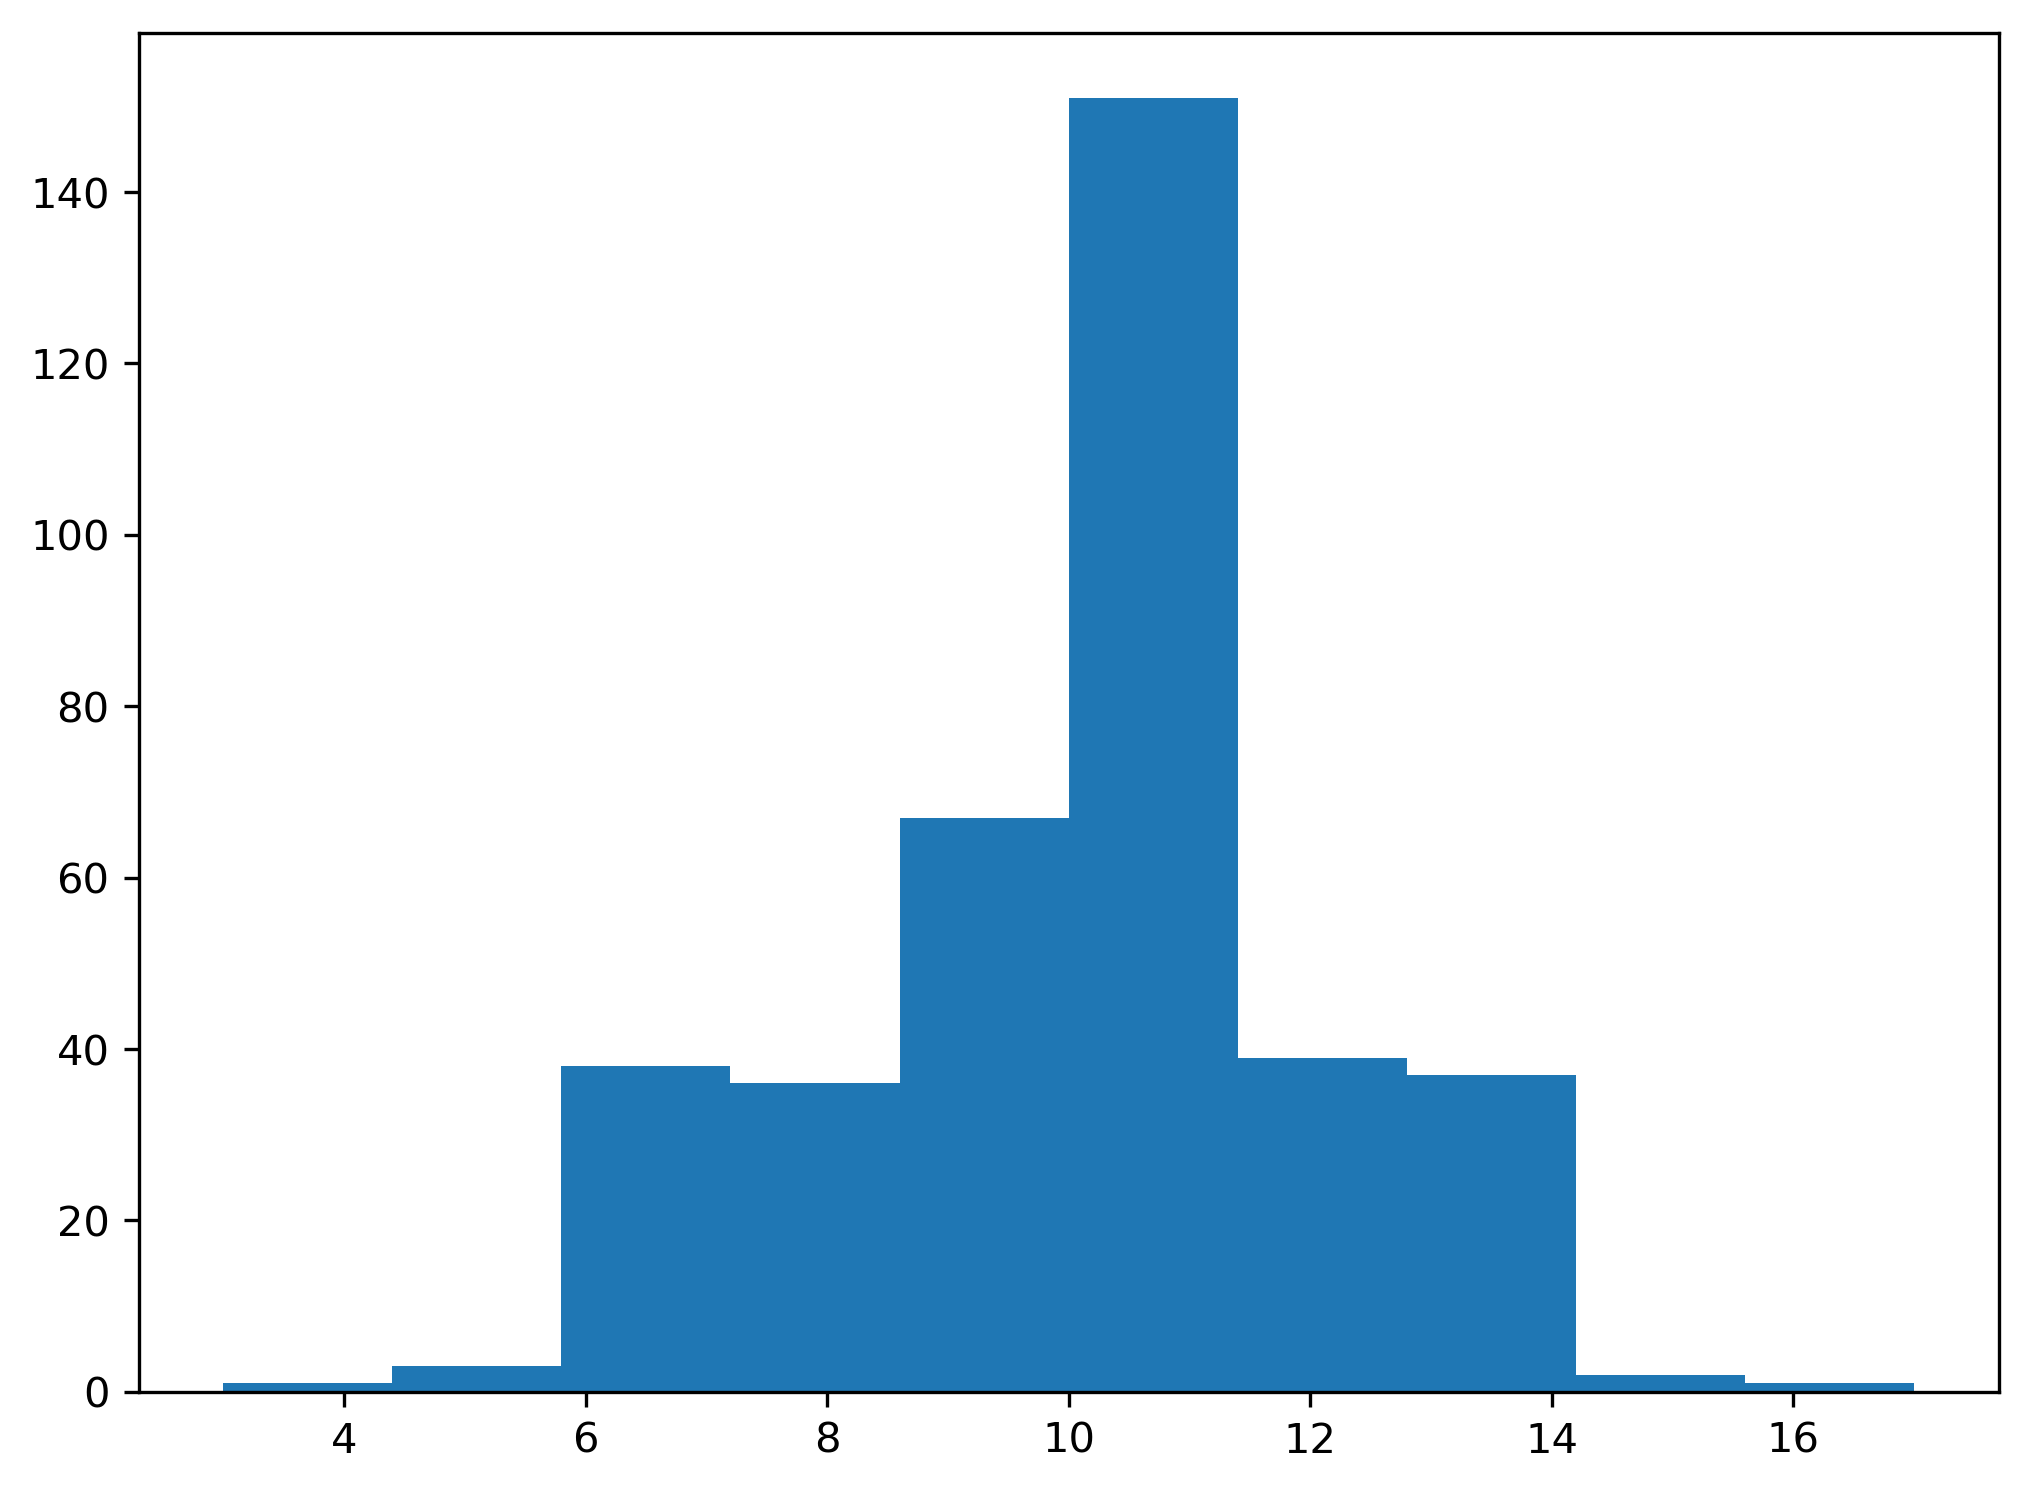

In [8]:
plt.figure(figsize=(8,6), dpi = 300)
plt.hist(train_3[:,1])
plt.show()

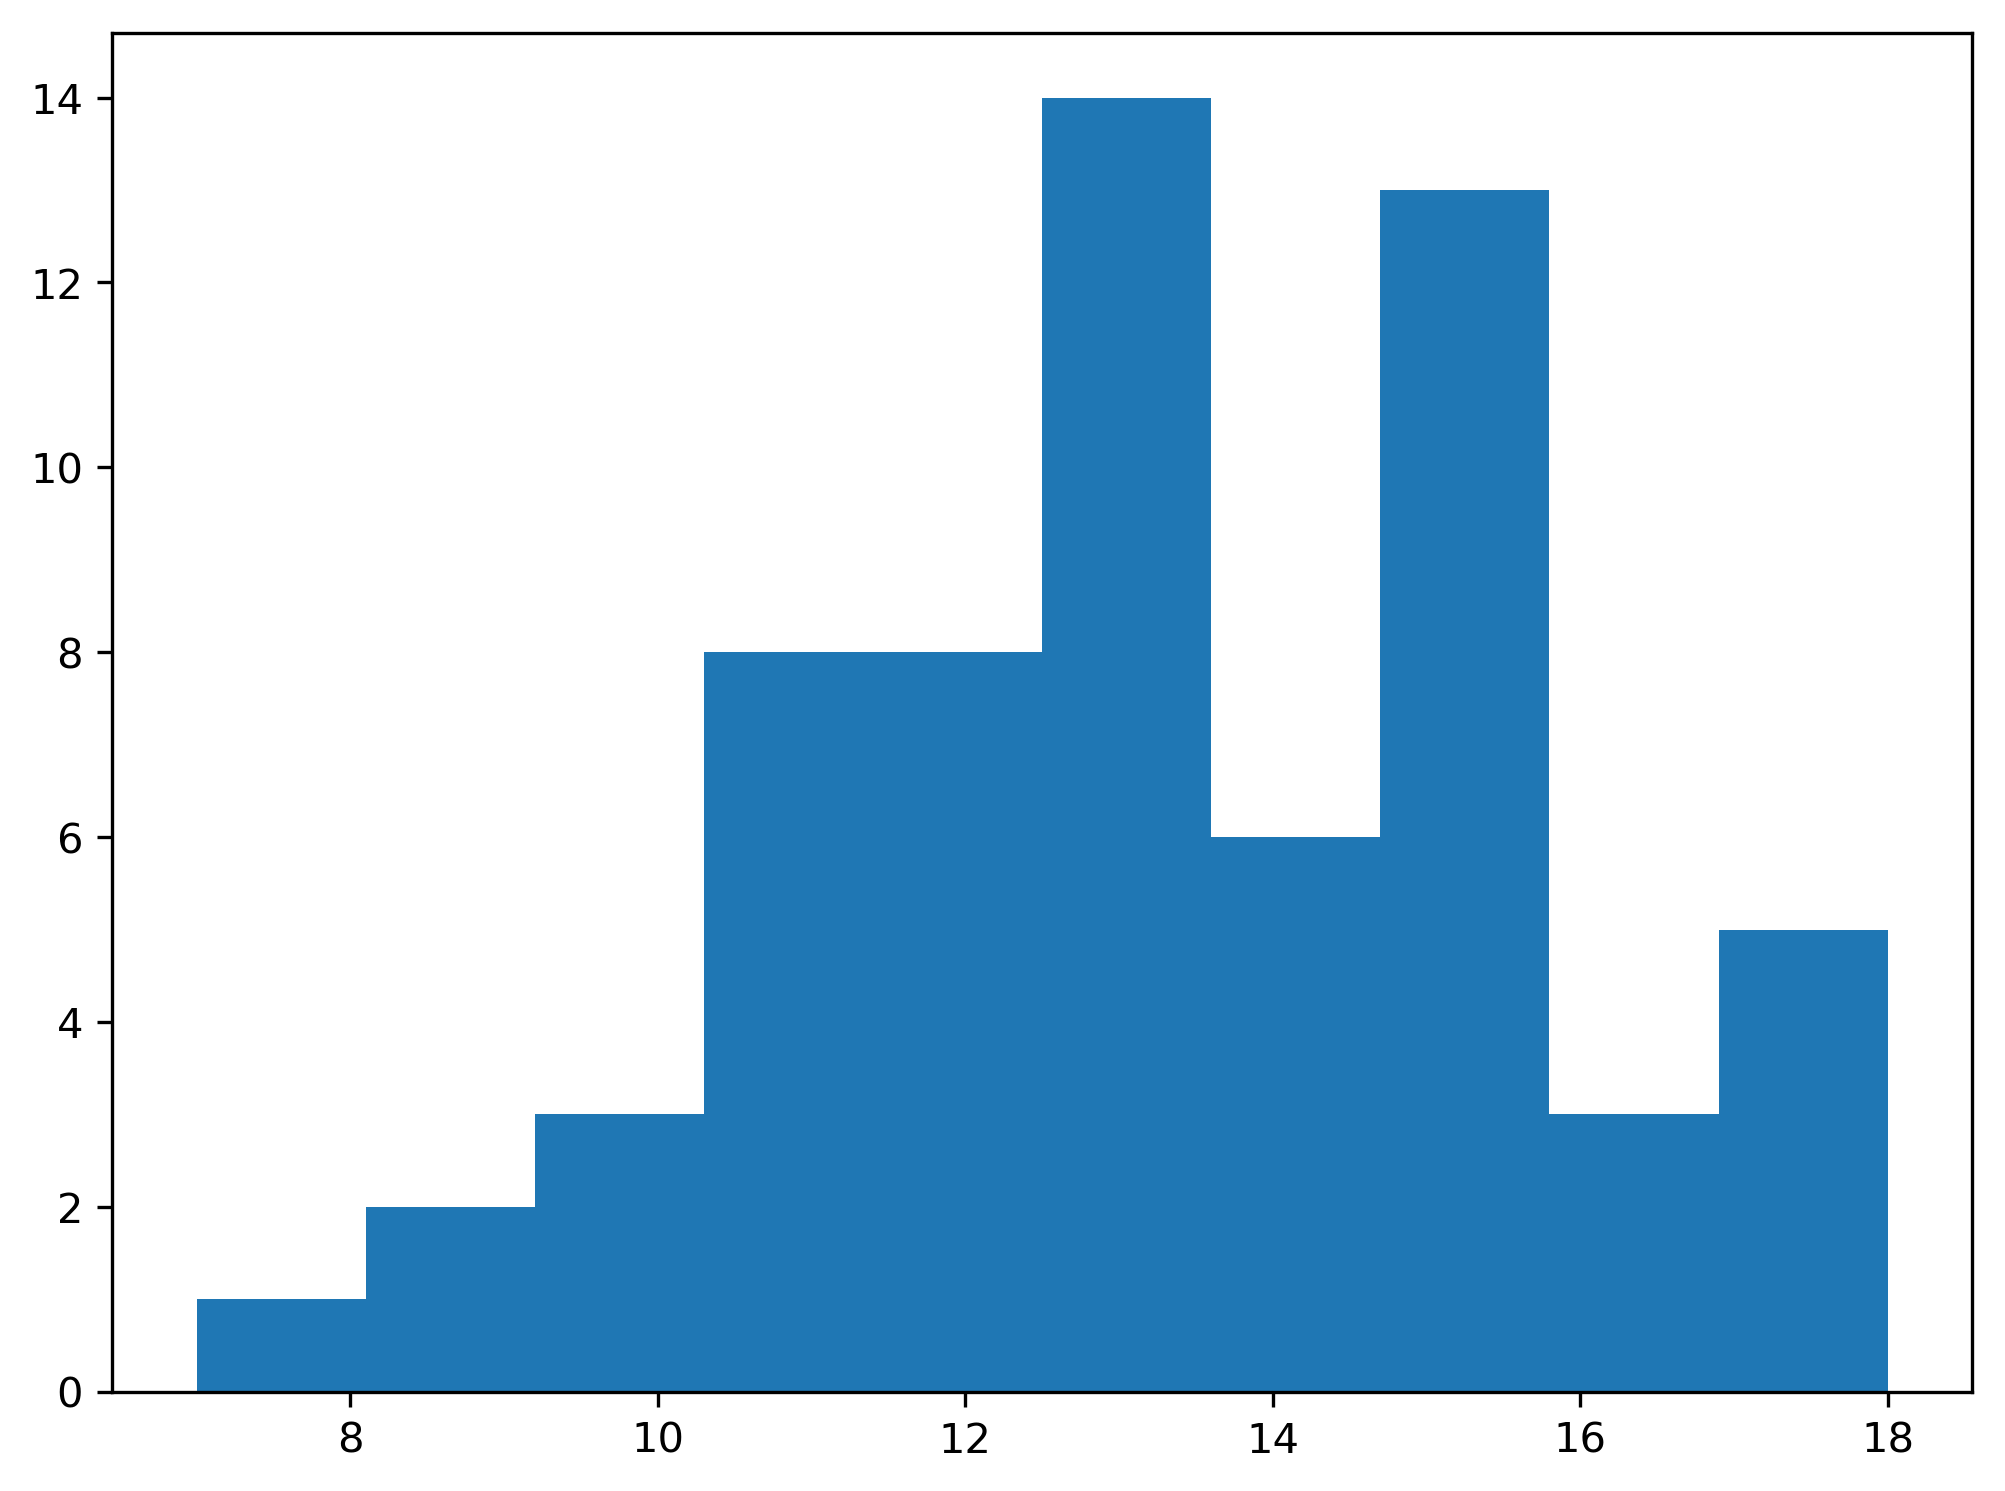

In [9]:
plt.figure(figsize=(8,6), dpi = 300)
plt.hist(train_4[:,1])
plt.show()

In [10]:
#Q2
def learnMean(Data,classNum):
    data = Data[Data[:,0] == classNum]
    sum_ = data[:,1].sum()
    divisor = len(data)
    return sum_/divisor
        
    

In [11]:
learnMean(train,3)

10.053333333333333

In [12]:
len(np.array([1, 3, 8, 5]))

4

In [13]:
#Q3
def labelML(amountAlc, meanVector):
    label = ['M','Y','A','S']
    list_pro = []
    for n in range(len(meanVector)):
        pro = 1/((2*np.pi)**0.5 *2)* np.e**((amountAlc - meanVector[n])**2/(-8))                                    
        list_pro.append(pro)
    
    return label[np.argmax(list_pro)]
    

In [14]:
labelML(6,np.array([1, 3, 8, 5]))

'S'

In [15]:
mvector = np.array([learnMean(train,1),learnMean(train,2),learnMean(train,3),learnMean(train,4)])
mvector

array([ 6.09360731,  8.6592    , 10.05333333, 13.25396825])

In [16]:
#Q4 
def labelMP(amountAlc, meansVector, priorVector):
    label = ['M','Y','A','S']
    nprovector = np.append(priorVector, 1-priorVector.sum())
    list_pro = []
    for n in range(len(meansVector)):
        pro = 1/((2*np.pi)**0.5 *2)* np.e**((amountAlc - meansVector[n])**2/(-8)) * nprovector[n]
                                            
        list_pro.append(pro)
    
    return label[np.argmax(list_pro)]
    

In [17]:
labelMP(7,meansVector=mvector,priorVector=np.array([.3,.4,.2]))

'Y'

In [18]:
#Q5
def evaluateML(testData, meanVector):
    pred = np.zeros(testData.shape[0])
    labels = testData[:,0]
    for instance in range(testData.shape[0]):
        list_pro = []
        for n in range(len(meanVector)):
            pro = 1/((2*np.pi)**0.5 *2)* np.e**((testData[:,1][instance] - meanVector[n])**2/(-8))
            list_pro.append(pro)
        pred[instance] = np.argmax(list_pro) + 1
        
    return list(pred - labels).count(0)/testData.shape[0]
        

In [19]:
evaluateML(test,meanVector = np.array([1, 3, 7, 5]))

0.2708333333333333

In [20]:
#Q6
def evaluateMP(testData, meanVector, priorVector):
    pred = np.zeros(testData.shape[0])
    labels = testData[:,0]
    nprovector = np.append(priorVector, 1-priorVector.sum())
    for instance in range(testData.shape[0]):
        list_pro = []
        for n in range(len(meanVector)):
            pro = 1/((2*np.pi)**0.5 *2)* np.e**((testData[:,1][instance] - meanVector[n])**2/(-8)) * nprovector[n]
            list_pro.append(pro)
        pred[instance] = np.argmax(list_pro) + 1
    return list(pred - labels).count(0)/testData.shape[0]
    

In [21]:
'''
Q7
Report the percent of correctly labeled test data for max likelihood and max posterior
separately when means are learned:
'''

'\nQ7\nReport the percent of correctly labeled test data for max likelihood and max posterior\nseparately when means are learned:\n'

In [22]:
def get_firstdata(data,row):
    train = data[:row,:]
    train_1 = train[train[:,0] == labels[0]]
    train_2 = train[train[:,0] == labels[1]]
    train_3 = train[train[:,0] == labels[2]]
    train_4 = train[train[:,0] == labels[3]]
    mvector = np.array([learnMean(train,1),learnMean(train,2),learnMean(train,3),learnMean(train,4)])
    return mvector

In [23]:
#on the first 6 data points in the training set,
mvectorf6 = get_firstdata(train,6)
print('max likelihood is', evaluateML(test,mvectorf6))
print('max posterior is', evaluateMP(test,mvectorf6,np.array([.3,.4,.2])))

max likelihood is 0.5433333333333333
max posterior is 0.5591666666666667


In [24]:
# on the first 18 data points
mvectorf18 = get_firstdata(train,18)
print('max likelihood is %.2f '%evaluateML(test,mvectorf18))
print('max posterior is', evaluateMP(test,mvectorf18,np.array([.3,.4,.2])))
# on the first 54 data points,
mvectorf54 = get_firstdata(train,54)
print('max likelihood is %.2f '%evaluateML(test,mvectorf54))
print('max posterior is', evaluateMP(test,mvectorf54,np.array([.3,.4,.2])))
# on and the first 162 data points
mvectorf162 = get_firstdata(train,162)
print('max likelihood is %.2f '%evaluateML(test,mvectorf162))
print('max posterior is', evaluateMP(test,mvectorf162,np.array([.3,.4,.2])))


max likelihood is 0.54 
max posterior is 0.57
max likelihood is 0.54 
max posterior is 0.58
max likelihood is 0.53 
max posterior is 0.57


In [25]:
# Q8 
d8 = scio.loadmat('hw1dataQ8.mat')
train8 = d8['trainData']
test8 = d8['testData']

In [29]:
def labelMP2(amountDrinks, meansMatrix, priorVector):
    label = ['M','Y','A','S']
    nprovector = np.append(priorVector, 1-priorVector.sum())
    list_pro_soda = []
    for n in range(len(label)): # this is for soda
        pro = 1/((2*np.pi)**0.5 *2)* np.e**((amountDrinks - meansMatrix[1][n])**2/(-8)) * nprovector[n]                                  
        list_pro_soda.append(pro)
    
    list_pro_alchol = []
    for n in range(len(label)): # this is for soda
        pro = 1/((2*np.pi)**0.5 *2)* np.e**((amountDrinks - meansMatrix[0][n])**2/(-8)) * nprovector[n]                                  
        list_pro_alchol.append(pro)
    
    answer = np.array(list_pro_soda) * np.array(list_pro_alchol)
    return label[np.argmax(answer)]
    

'M'